In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"conghuannguyen","key":"ff2367adcaa387497c8aaa94218cb876"}'}

In [2]:
! rm -r ~/.kaggle
! mkdir ~/.kaggle
! mv ./kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
! kaggle competitions download titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 52.8MB/s]


In [4]:
! mkdir /content/titanic

In [5]:
! unzip /content/titanic.zip -d /content/titanic/

Archive:  /content/titanic.zip
  inflating: /content/titanic/gender_submission.csv  
  inflating: /content/titanic/test.csv  
  inflating: /content/titanic/train.csv  


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
train_data = pd.read_csv('/content/titanic/train.csv')
test_data = pd.read_csv('/content/titanic/test.csv')

A look at the data

In [8]:
train_data.info()
train_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Dealing with null (missing values) data in 'Age' and 'Fare' columns. The 'Cabin' column will be dealt with later.

---
Fill in with mean values.


In [10]:
train_data.Age.fillna(train_data.Age.mean(), inplace=True)
test_data.Age.fillna(test_data.Age.mean(), inplace=True)

In [11]:
test_data[test_data['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [12]:
test_data.Fare.fillna(test_data.Fare.mean(), inplace=True)

Examine how the feature columns affect the outcome ('Survived' column). This is called "finding correlation".

In [20]:
corr = train_data.loc[:, train_data.columns != 'PassengerId'].corr(numeric_only=True)
corr # The corr() function computes the pairwise correlation of columns
     # Higher value means more significant relationships

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<ipython-input-22-a5cff1831bea>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(plot_data.columns)


IndexError: ignored

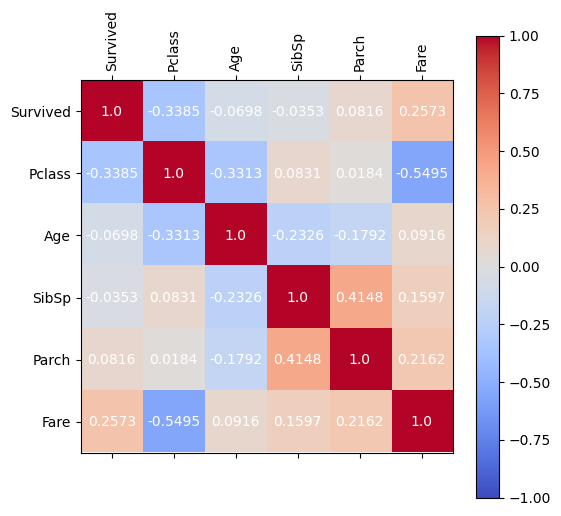

In [22]:
# Looking at a lot of numbers is confusing... so let's plot it.
# Do I know all of these? No. I took an example from a dataset about diabetes
# (also on Kaggle) and apply the plot code.

col = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plot_data = train_data[col].copy()
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(plot_data.columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(plot_data.columns)
plt.xticks(rotation = 90)
ax.set_yticklabels(plot_data.columns)
ax.set_yticks(ticks)
for i in range(train_data.shape[1]):
  for j in range(6):
    text = ax.text(j, i, round(corr.iloc[i][j],4), ha="center", va="center", color="w")
plt.show()

In [24]:
# Okay so... it's not perfect. Error still exists (out-of-bounds) but the
# important thing is we now have the values. From these values, let's get the
# top 3 features with the highest correlation with the 'Survived' outcome.
print(train_data.loc[:, train_data.columns != 'PassengerId'].corr(numeric_only=True).nlargest(4, 'Survived').index)
print(train_data.loc[:, train_data.columns != 'PassengerId'].corr(numeric_only=True).nlargest(4, 'Survived').values[:, 5])

Index(['Survived', 'Fare', 'Parch', 'SibSp'], dtype='object')
[0.25730652 1.         0.21622494 0.15965104]


So 'Fare', 'Parch' and 'SibSp' are the three most influential featues to the 'Survived' outcome.


However, consider the sample submission (which only counts for gender), there may be more features contributing to the outcome. If we use human logic: Young people may have a higher chance to survive than old people; men may be more likely to survive than women...


So for this case, let's factor Sex and Age into the game. One problem: The Sex column is in strings. Machines can't work with strings.


More preprocessing will be needed.

In [25]:
# One way we can deal with this is by making an "isMale" column, data type integer.
# If the passenger's gender is male, then isMen is 1, else it's 0.
train_data['isMale'] = np.where(train_data['Sex'] == 'male', 1, 0)
test_data['isMale'] = np.where(test_data['Sex'] == 'male', 1, 0)

In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isMale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [27]:
base_features = ['Fare', 'Parch', 'SibSp', 'Age', 'isMale']

X_train, y_train = train_data[base_features], train_data['Survived'].copy()
X_test = test_data[base_features]

Evaluate the best algorithm to use

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# There are many more "fancy" classification models, but for practice purpose,
# these basic ones will do.
from sklearn.model_selection import cross_val_score

Evaluate the algorithms in terms of accuracy, using cross validation. Save the results and compare

In [29]:
acc_score = []
logis = LogisticRegression()
logis_score = cross_val_score(logis, X_train, y_train, cv=50, scoring='accuracy').mean()

In [30]:
print(logis_score)
acc_score.append(logis_score)

0.7892156862745098


In [31]:
decision = DecisionTreeClassifier(random_state = 50)
decision_score = cross_val_score(decision, X_train, y_train, cv=50, scoring='accuracy').mean()

In [32]:
print(decision_score)
acc_score.append(decision_score)

0.7703267973856208


In [33]:
knn_cv = KNeighborsClassifier(n_neighbors=30)
knn_score = cross_val_score(knn_cv, X_train, y_train, cv=50, scoring='accuracy').mean()

In [34]:
print(knn_score)
acc_score.append(knn_score)

0.7098039215686275


In [35]:
rdf = RandomForestClassifier(random_state=30)
rdf_score = cross_val_score(rdf, X_train, y_train, cv=50, scoring='accuracy').mean()

In [36]:
print(rdf_score)
acc_score.append(rdf_score)

0.8174509803921568


In [37]:
algorithms = ["Logistic Regression", "Decision Tree", "K Nearest Neighbors", "Random Forest"]
cv_mean = pd.DataFrame(acc_score, index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
Random Forest,0.817451
Logistic Regression,0.789216
Decision Tree,0.770327
K Nearest Neighbors,0.709804


With the result above, Random Forest grants us the highest accuracy. So we'll use it to fit our test data and make predictions.

In [38]:
# The default number of trees in Random Forest (n_estimators) is 100.
# We will use this value for now.

rdf.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [39]:
predictions = rdf.predict(X_test)

In [40]:
X_test.columns

Index(['Fare', 'Parch', 'SibSp', 'Age', 'isMale'], dtype='object')

In [41]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'isMale'],
      dtype='object')

In [42]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

In [43]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
